In [2]:
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Uncommented here, because it runs only on Copilot
# sentiment_task = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

In [4]:
# Load the data
# data = pd.read_csv('../output/preprocessed.csv')

In [5]:
# Uncommented here, because it runs only on Copilot
# data['sentiment'] = sentiment_task(data['text'].tolist())

In [ ]:
# data['sentiment_label'] = data['sentiment'].apply(lambda x: x['label'])
# data['sentiment_score'] = data['sentiment'].apply(lambda x: x['score'])
# data = data.drop(columns=['sentiment'])

In [6]:
# Load the data from colab
data = pd.read_csv('../output/sentiment.csv')

In [8]:
# Display the first few rows of the dataframe to verify the results
data[['text', 'sentiment_label', 'sentiment_score']].head()

,text,sentiment_label,sentiment_score
0,run business mean juggle countless administrat...,positive,0.700187
1,liz truss walk linger shadow predecessor charl...,negative,0.751176
2,uk brace war government building london raise ...,neutral,0.801022
3,marry second cousin remove taboo think genetic...,neutral,0.605496
4,truly disgraceful indian national congress sto...,negative,0.928497


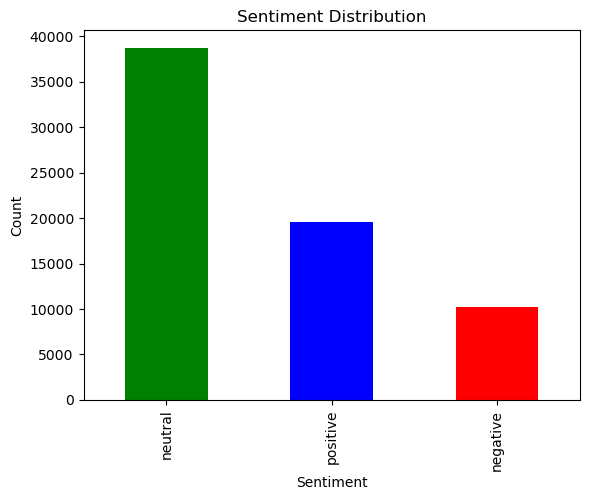

In [9]:
# Count the occurrences of each sentiment label
sentiment_counts = data['sentiment_label'].value_counts()

# Plot the sentiment distribution
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

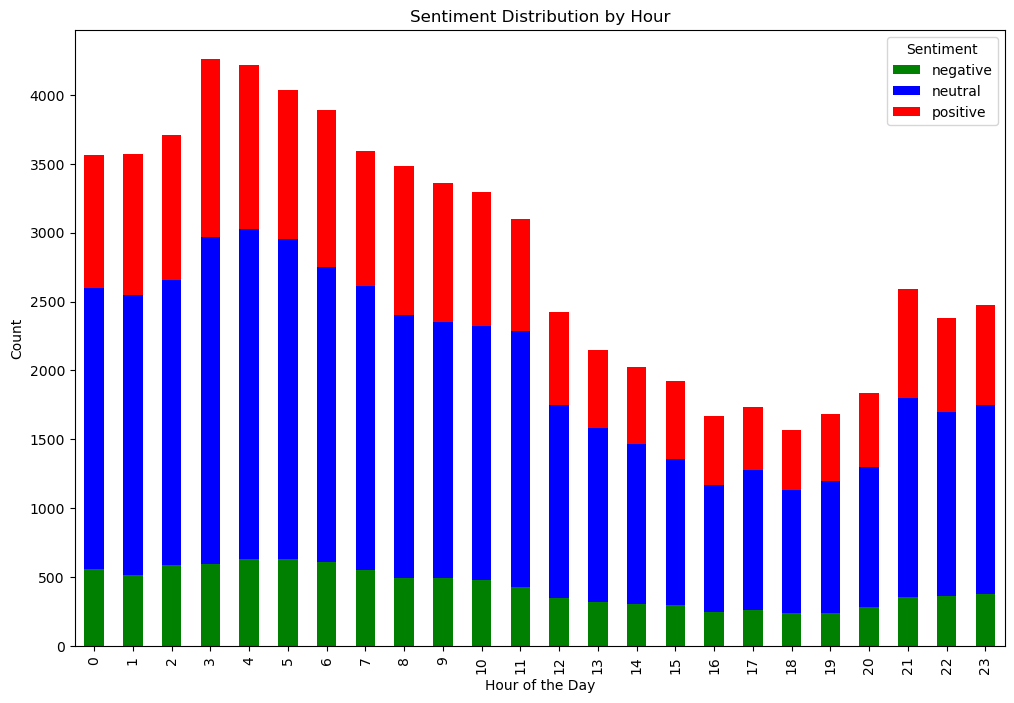

In [10]:
# Convert the timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S')

# Extract the hour from the timestamp
data['hour'] = data['timestamp'].dt.hour

# Group by hour and sentiment label, then count the occurrences
hourly_sentiment = data.groupby(['hour', 'sentiment_label']).size().unstack(fill_value=0)

# Plot the sentiment distribution by hour
hourly_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'blue', 'red'])
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Hour')
plt.legend(title='Sentiment')
plt.show()

In [11]:
# Filter the negative posts
negative_posts = data[data['sentiment_label'] == 'negative']

# Sort by sentiment score in descending order
top_negative_posts = negative_posts.sort_values(by='sentiment_score', ascending=False).head(50)

pd.set_option('display.max_colwidth', None)
top_negative_posts.text

23415                                                            absolutely speechless late cabinet appointment itsa disaster wait happen god help cabinetappointmentfail
1390                                                             absolutely speechless late cabinet appointment itsa disaster wait happen god help cabinetappointmentfail
58693                                                              frustrated education system toll mental health feel like handle mentalhealthmatter educationsystemsuck
50823                                                                     jacksonkatherine terrible experience company recommend customer service par customerservicefail
56689                                                                     jacksonkatherine terrible experience company recommend customer service par customerservicefail
37688     lack respect professionalism current uk government truly disappointing essential cabinet minister uphold gravita dignity role ukpolitic gove